### Netflix Data Analysis

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df=pd.read_csv("mymoviedb.csv",lineterminator='\n')
df.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [100]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [101]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], shape=(2337,), dtype=object)

In [102]:
df.duplicated().sum()

np.int64(0)

In [103]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827,9827.000000,9827.000000,9827.000000
mean,2006-09-23 11:05:51.317798144,40.326088,1392.805536,6.439534
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-18 00:00:00,16.128500,146.000000,5.900000
50%,2011-09-13 00:00:00,21.199000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.191500,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.873998,2611.206907,1.129759


In [104]:
df.columns


Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [105]:
df.drop(columns=["Overview","Original_Language"],inplace=True)
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [106]:
df.drop(columns=["Poster_Url"],inplace=True)
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"


In [107]:
df['year']=df['Release_Date'].dt.year
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022


In [108]:
def catigorize_col (df, col, labels):
 
 edges = [df[col].describe()['min'],
 df[col].describe()['25%'],
 df[col].describe()['50%'],
 df[col].describe()['75%'],
 df[col].describe()['max']]

 df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
 return df


labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()




['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [109]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [110]:
df['Vote_Average'].value_counts()


Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [111]:
df.dropna(inplace=True)
df.isna().sum()


Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
year            0
dtype: int64

In [112]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)


In [ ]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [115]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25552 non-null  datetime64[ns]
 1   Title         25552 non-null  object        
 2   Popularity    25552 non-null  float64       
 3   Vote_Count    25552 non-null  int64         
 4   Vote_Average  25552 non-null  category      
 5   Genre         25552 non-null  category      
 6   year          25552 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 949.2+ KB


In [117]:
sns.set_style('whitegrid')


### Q1: What is the most frequent genre in the dataset?

In [119]:
df['Genre'].describe()


count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

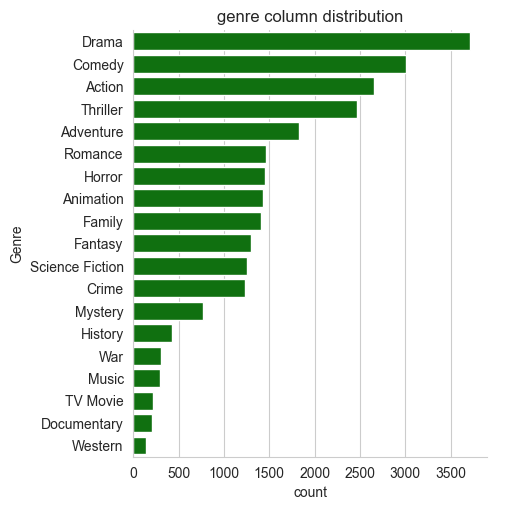

In [124]:
sns.catplot(y="Genre",data=df,kind="count",color="Green",order=df["Genre"].value_counts().index,)
plt.title('genre column distribution')
plt.show()

### Q2: What has highest votes in vote average column ?

In [125]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021


In [126]:
df['Vote_Average'].value_counts()

Vote_Average
average        6613
popular        6520
below_avg      6348
not_popular    6071
Name: count, dtype: int64

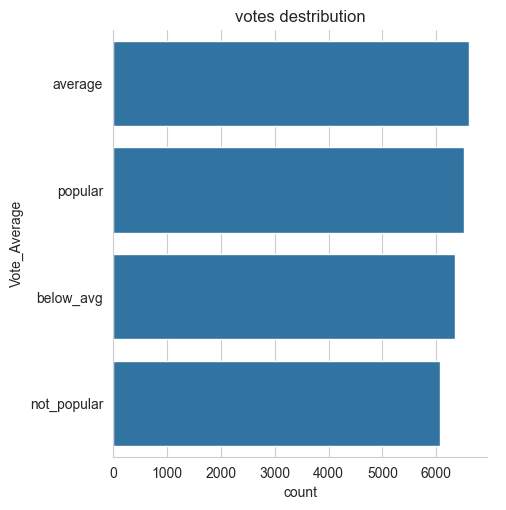

In [137]:
sns.catplot(y="Vote_Average",kind="count",data=df,order=df['Vote_Average'].value_counts().index)
plt.title('votes destribution')
plt.show() 

### Q3: What movie got the highest popularity ? what's its genre ?


In [139]:
df[df['Popularity'] == df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


### Q4: What movie got the Lowest popularity ? what's its genre ?


In [140]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25548,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021
25549,1984-09-23,Threads,13.354,186,popular,War,1984
25550,1984-09-23,Threads,13.354,186,popular,Drama,1984
25551,1984-09-23,Threads,13.354,186,popular,Science Fiction,1984


### Q5: Which year has the most filmmed movies?

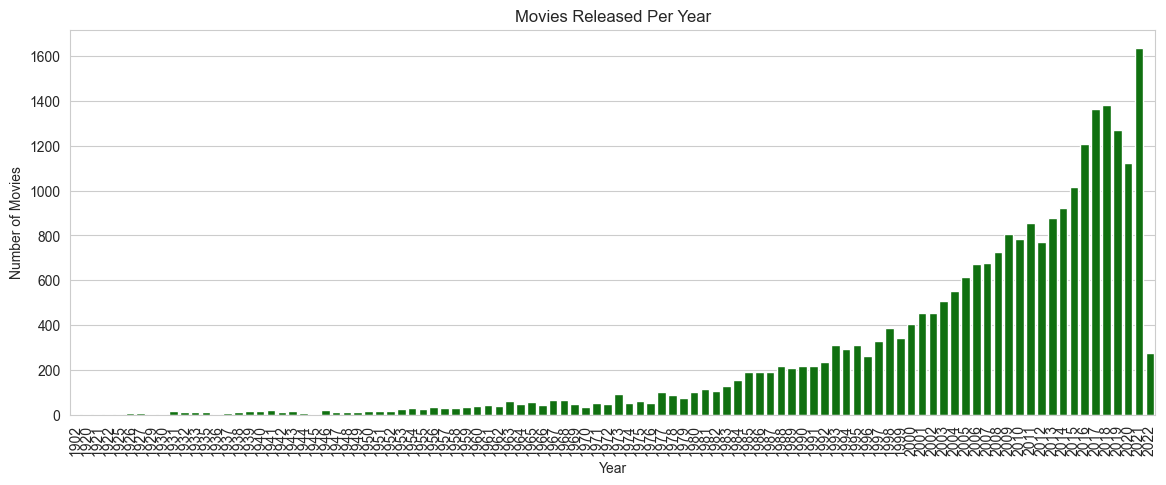

In [148]:
plt.figure(figsize=(14,5))
sns.barplot(
    x=df['year'].value_counts().sort_index().index,
    y=df['year'].value_counts().sort_index().values,
    color="green"
)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Movies Released Per Year")
plt.show()
